In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [ ]:
def visualize(data, labels = None):
  pca_ = PCA(n_components=2).fit_transform(data)
  pca_x = tsne_x = [x_[0] for x_ in pca_]
  pca_y = [x_[1] for x_ in pca_]
  ax = plt.gca()
  plt.scatter(pca_x, pca_y, alpha=0.25)
  if labels:
    for i, name in enumerate(labels):
      text = ax.annotate(name, (pca_x[i], pca_y[i]))
  plt.show()

In [ ]:
import pandas as pd
filepath = "https://raw.githubusercontent.com/hamzafarooq/maven-mlsystem-design-cohort-1/main/data/miami_hotels.csv"

data = pd.read_csv(filepath)
data.head()

,id,type,name,image,awards,rankingPosition,priceLevel,priceRange,category,rating,...,prices,latitude,longitude,webUrl,website,rankingString,rankingDenominator,numberOfReviews,review,title
0,7787044,HOTEL,Faena Miami Beach,https://media-cdn.tripadvisor.com/media/photo-...,[],5,$$$$,"$729 - $1,426",hotel,4.5,...,[],25.807375,-80.12364,https://www.tripadvisor.com/Hotel_Review-g3443...,https://www.faena.com/miami-beach,#5 of 235 hotels in Miami Beach,235,2123,Hands down my absolute favorite hotel in South...,My favorite hotel in Miami--Petar is the best!
1,7787044,HOTEL,Faena Miami Beach,https://media-cdn.tripadvisor.com/media/photo-...,[],5,$$$$,"$729 - $1,426",hotel,4.5,...,[],25.807375,-80.12364,https://www.tripadvisor.com/Hotel_Review-g3443...,https://www.faena.com/miami-beach,#5 of 235 hotels in Miami Beach,235,2123,There are not enough words to explain the sump...,Exquisite Stay
2,7787044,HOTEL,Faena Miami Beach,https://media-cdn.tripadvisor.com/media/photo-...,[],5,$$$$,"$729 - $1,426",hotel,4.5,...,[],25.807375,-80.12364,https://www.tripadvisor.com/Hotel_Review-g3443...,https://www.faena.com/miami-beach,#5 of 235 hotels in Miami Beach,235,2123,I went for the Burlesque show which was absolu...,Burlesqu Show
3,7787044,HOTEL,Faena Miami Beach,https://media-cdn.tripadvisor.com/media/photo-...,[],5,$$$$,"$729 - $1,426",hotel,4.5,...,[],25.807375,-80.12364,https://www.tripadvisor.com/Hotel_Review-g3443...,https://www.faena.com/miami-beach,#5 of 235 hotels in Miami Beach,235,2123,Dana at Gitano made the night magical! He make...,Dana at Gitano is a rockstar!
4,7787044,HOTEL,Faena Miami Beach,https://media-cdn.tripadvisor.com/media/photo-...,[],5,$$$$,"$729 - $1,426",hotel,4.5,...,[],25.807375,-80.12364,https://www.tripadvisor.com/Hotel_Review-g3443...,https://www.faena.com/miami-beach,#5 of 235 hotels in Miami Beach,235,2123,I would like to give our very very heartfelt t...,Perfect Place


In [ ]:
documents = data.review.values[:100]


## TF-IDF

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

tf(t,d) = count of t in d / number of words in d


BM25 is more than a term scoring method, but rather a method for scoring documents with relation to a query. Tf-idf is a term scoring method, which can be incorporated in a document scoring method using a similarity measure (say cosine).






In [ ]:
import numpy as np
#note that this implementation is really inefficient, feel free to optimize.
class TfidfVectorizer:
  def __init__(self, corpus, vocab = None):
    self.corpus = corpus
    self.total_documents = len(corpus)
    if not vocab:
      self.vocab =  self.__vocab_parser(' '.join(self.corpus).split(' '))
    else:
      self.vocab = vocab

  def __vocab_parser(self, vocab):
    return list(set([i.lower() for i in vocab]))

  def create_index(self):
    self.word_count = {}
    self.__index_dict = {}
    i = 0
    for word in self.vocab:
        #word = banana
        self.__index_dict[word] = i
        #["the", "book", "banana","pizza","..."]
        #{"the":0, "book":1}
        i+=1
        self.word_count[word] = 0

        for document in self.corpus:
            #banana on pizza is good
            if word in document.split(' '):
                self.word_count[word] += 1

  def fit_transform(self):
    self.create_index()
    return [self.transform(document) for document in self.corpus]

  def transform(self, document):
    tf_idf_vec = np.zeros((len(self.vocab),))
    for word in document.split(' '):
        token = word.lower()
        tf = self.__termfreq(document, token)
        idf = self.__inverse_doc_freq(token)
        value = tf*idf
        if token not in self.__index_dict:
          print(f'{word} is not present in the known vocabulary')
          continue
        tf_idf_vec[self.__index_dict[token]] = value

    return tf_idf_vec

  def __termfreq(self, document, word):
    N = len(document)
    occurance = len([token for token in document.split(' ') if token.lower() == word])
    return occurance/N

  def __inverse_doc_freq(self, word):
      if word in self.word_count:
          word_occurance = self.word_count[word] + 1
      else:
          word_occurance = 1
      return np.log(self.total_documents/word_occurance)


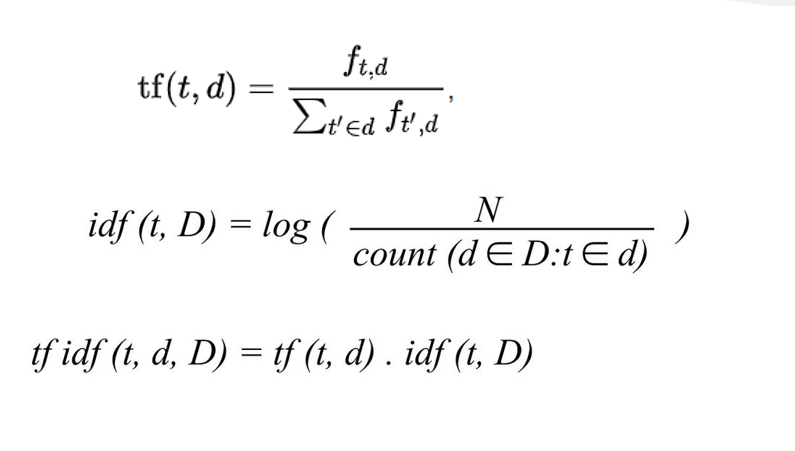

In [ ]:
tfidf = TfidfVectorizer(documents) #note that this implementation is really inefficient
word_vectors = tfidf.fit_transform()

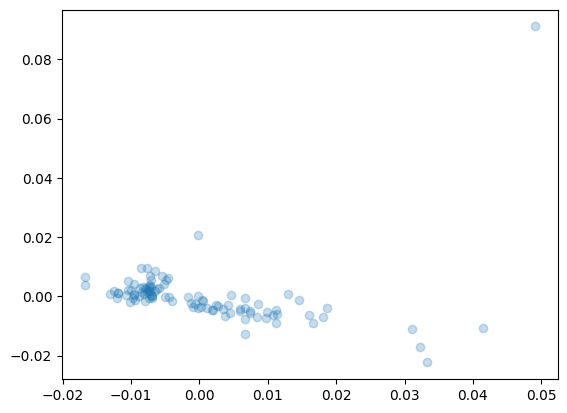

In [ ]:
visualize(word_vectors)

In [ ]:
def get_results(query, query_vector, word_vectors):
    cosine_sim = cosine_similarity(query_vector, word_vectors)
    print(f"Results for query '{query}'")
    result = pd.DataFrame(data = {"documents": documents, 'similarity': cosine_sim[0]}).sort_values("similarity", ascending=False)
    return result

In [ ]:
def custom_search(query):
  query_vector = tfidf.transform(query).reshape(1,-1)
  return get_results(query, query_vector, word_vectors);

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

def sklearn_search(query):
  query_vector = tfidf_vectorizer.transform([query])
  return get_results(query, query_vector, tfidf_matrix)

In [ ]:
query = 'Amazing hotels near the beach with a big bar'

In [ ]:
custom_search(query)

near is not present in the known vocabulary
Results for query 'Amazing hotels near the beach with a big bar'


,documents,similarity
59,Had a great time at dinner here. Great space w...,0.183919
20,"Amazing hotel, staff, food and service. Pool a...",0.155267
30,Nice Hotel. Overpriced but nice for Miami. Cam...,0.092690
27,Stayed at Faena recently with my significant o...,0.090244
40,Faena is a fantastic hotel - gorgeous finishes...,0.069889
...,...,...
47,"We had the best experience ever , thanks to ou...",0.000024
72,I travel to Miami often and have visited many ...,0.000016
92,"Very nice hotel, Ros Angel, and Alexander Maga...",0.000014
64,"O hotel é perfeito, atendimento excepcional !!...",0.000013


In [ ]:
sklearn_search(query)

Results for query 'Amazing hotels near the beach with a big bar'


,documents,similarity
20,"Amazing hotel, staff, food and service. Pool a...",0.204160
59,Had a great time at dinner here. Great space w...,0.203931
16,"I loved the experience at Faena hotel, especia...",0.138233
85,Amazing visit to the 1 hotel to make for an un...,0.125339
65,We loved our stay at the one hotel and the bea...,0.117565
...,...,...
11,Dana was beyond exceptional. Super personable ...,0.007531
99,Thanks to Angel for accommodating my early che...,0.007345
92,"Very nice hotel, Ros Angel, and Alexander Maga...",0.006586
36,I've been to Faena a lot of times and it was g...,0.005132


## Okapi BM 25
"BM25 is a bag-of-words retrieval function that ranks a set of documents based on the query terms appearing in each document, regardless of their proximity within the document. " -
[Wikipedia](https://en.wikipedia.org/wiki/Okapi_BM25)

In [ ]:
!pip install rank_bm25

In [ ]:
from rank_bm25 import BM25Okapi

corpus = documents

tokenized_corpus = [doc.lower().split(" ") for doc in corpus]

bm25 = BM25Okapi(tokenized_corpus)

In [ ]:
tokenized_query = 'learning'.lower().split(" ")
bm25.get_top_n(tokenized_query, corpus, n=5)


['Designing Machine Learning Systems (English Edition) ',
 'PlayMonster Kid O Mix and Match Animals Toddler Learning Toy',
 'Arduino Uno 3 Ultimate Starter Kit Includes 12 Circuit Learning Guide',
 'Designing Machine Learning Systems: An Iterative Process for Production-Ready Applications ',
 'Machine Learning Design Patterns: Solutions to Common Challenges in Data Preparation, Model Building, and MLOps (English Edition) ']